In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
dataset=pd.read_csv('BostonHousing.csv')

In [3]:
dataset.shape

(506, 14)

In [4]:
dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
dataset.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
dataset.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [8]:
dataset.dropna(inplace=True)

In [9]:
dataset.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [10]:
X=dataset.iloc[:,:-1] #independent features
y=dataset.iloc[:,-1] #dependent features

In [11]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [12]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

## Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
regressor=LinearRegression()

In [15]:
from sklearn.model_selection import cross_val_score

In [16]:
mse=cross_val_score(regressor,X,y,scoring='neg_mean_squared_error',cv=5)

In [17]:
mse

array([-12.03018583, -29.27729597, -32.23346492, -88.23272764,
       -33.16554275])

In [18]:
print(mse.mean())

-38.98784342151022


## Ridge Regression


In [19]:
from sklearn.linear_model import Ridge

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
ridge=Ridge()

In [22]:
ridge

Ridge()

In [23]:
parameters={'alpha':[1e-10,1e-5,1e-2,1e-3,1,5,10,11,20,30,40,50]}


In [24]:
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5,verbose=1)

In [25]:
ridge_regressor.fit(X,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-10, 1e-05, 0.01, 0.001, 1, 5, 10, 11, 20,
                                   30, 40, 50]},
             scoring='neg_mean_squared_error', verbose=1)

In [26]:
print(ridge_regressor.best_params_)

{'alpha': 50}


In [27]:
print(ridge_regressor.best_score_)

-31.96356802359002


## Lasso Regression

In [28]:
from sklearn.linear_model import Lasso

In [29]:
lasso=Lasso()

In [30]:
parameter={'alpha':[1e-10,1e-5,1e-2,1e-3,1,5,10,11,20,30,40,50,100,3,4,6]}
lasso_regressor=GridSearchCV(lasso,parameter,scoring='neg_mean_squared_error',cv=5,verbose=1)

In [31]:
lasso_regressor.fit(X,y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-10, 1e-05, 0.01, 0.001, 1, 5, 10, 11, 20,
                                   30, 40, 50, 100, 3, 4, 6]},
             scoring='neg_mean_squared_error', verbose=1)

In [32]:
print(lasso_regressor.best_params_)

{'alpha': 1}


In [33]:
print(lasso_regressor.best_score_)

-35.68931678038191


## Elastic Net

In [34]:
from sklearn.linear_model import ElasticNet

In [35]:
elasticnet=ElasticNet()

In [36]:
parameterss={'alpha':[1e-10,1e-5,1e-2,1e-3,1,5,10,11,20,30,40,50,100,3,4,6,44,33,23,233,222,33,34,42]}
elastic_regressor=GridSearchCV(elasticnet,parameterss,scoring='neg_mean_squared_error',cv=5,verbose=1)

In [37]:
elastic_regressor.fit(X,y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-10, 1e-05, 0.01, 0.001, 1, 5, 10, 11, 20,
                                   30, 40, 50, 100, 3, 4, 6, 44, 33, 23, 233,
                                   222, 33, 34, 42]},
             scoring='neg_mean_squared_error', verbose=1)

In [38]:
print(elastic_regressor.best_params_)

{'alpha': 1}


In [39]:
print(elastic_regressor.best_score_)

-32.43516040853432


In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [41]:
prediction_lasso=lasso_regressor.predict(X_test)
prediction_ridge=ridge_regressor.predict(X_test)
prediction_elastic=elastic_regressor.predict(X_test)

In [42]:
import seaborn as sns

/Users/siddanthapusandeep/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


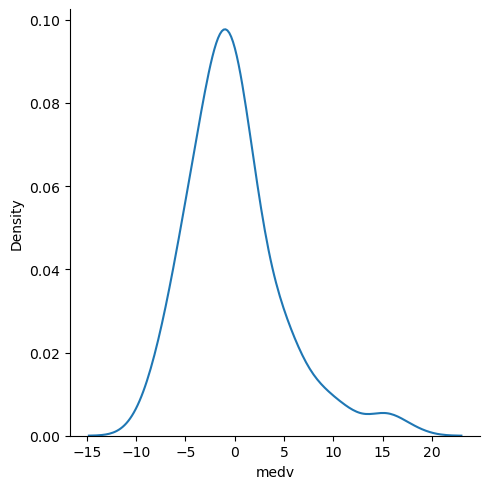

In [43]:
sns.displot(y_test-prediction_lasso,kind="kde")

/Users/siddanthapusandeep/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


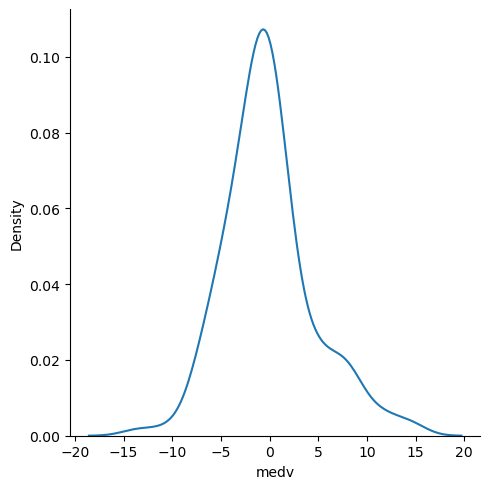

In [44]:
sns.displot(y_test-prediction_ridge,kind="kde")

/Users/siddanthapusandeep/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


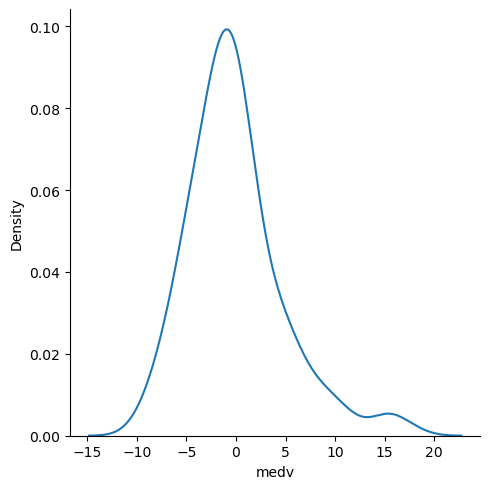

In [45]:
sns.displot(y_test-prediction_elastic,kind="kde")

### Performance Metrics 

In [46]:
from sklearn.metrics import r2_score

In [47]:
r2_score(y_test,prediction_lasso)

0.733022010677663

In [48]:
r2_score(y_test,prediction_ridge)

0.7620928955329587

In [49]:
r2_score(y_test,prediction_elastic)

0.7365358429541702